## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
dataset = pd.read_csv("bank-full.csv",delimiter=";")

# Data Analysis

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Numerical Data

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Balance

<AxesSubplot:ylabel='balance'>

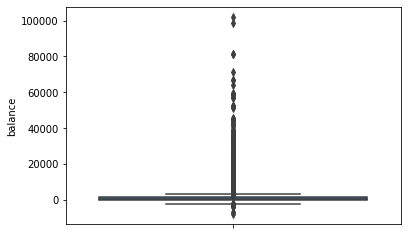

In [7]:
sns.boxplot(y=dataset['balance'])

theoritical maximum is 3462
theoritical minimum is -1962

In [8]:
dataset.balance[dataset["balance"]>3462].count()

4712

In [9]:
dataset.y[dataset["balance"]>3462].value_counts()

no     3946
yes     766
Name: y, dtype: int64

In [10]:
dataset.balance[dataset["balance"]<-1962].count()

17

In [11]:
dataset.balance.count()

45211

In [12]:
i=dataset.balance[dataset["balance"]>3462].index

In [13]:
i1 = dataset.balance[dataset["balance"]<-1962].index

In [14]:
dataset = dataset.drop(i)

In [15]:
dataset = dataset.drop(i1)

In [16]:
dataset.count()

age          40482
job          40482
marital      40482
education    40482
default      40482
balance      40482
housing      40482
loan         40482
contact      40482
day          40482
month        40482
duration     40482
campaign     40482
pdays        40482
previous     40482
poutcome     40482
y            40482
dtype: int64

### Day

<AxesSubplot:ylabel='day'>

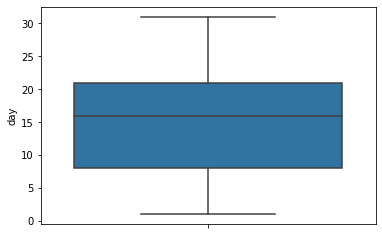

In [17]:
sns.boxplot(y=dataset['day'])

### Duration

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


In [18]:
dataset = dataset.drop("duration",axis=1)

### Campaign

<AxesSubplot:ylabel='campaign'>

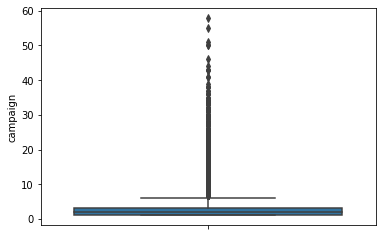

In [19]:
sns.boxplot(y=dataset['campaign'])

In [20]:
dataset.balance[dataset["campaign"]>6].count()

2766

In [21]:
dataset.y.value_counts()

no     35960
yes     4522
Name: y, dtype: int64

In [22]:
dataset.y[dataset["campaign"]>6].value_counts()

no     2630
yes     136
Name: y, dtype: int64

In [23]:
j = dataset.y[dataset["campaign"]>6].index

In [24]:
dataset = dataset.drop(j)

In [25]:
dataset.count()

age          37716
job          37716
marital      37716
education    37716
default      37716
balance      37716
housing      37716
loan         37716
contact      37716
day          37716
month        37716
campaign     37716
pdays        37716
previous     37716
poutcome     37716
y            37716
dtype: int64

### pdays

<AxesSubplot:ylabel='pdays'>

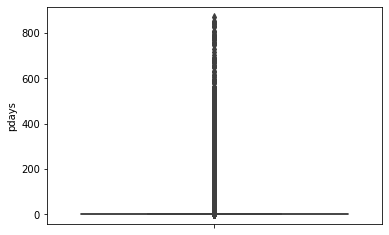

In [26]:
sns.boxplot(y=dataset['pdays'])

In [27]:
dataset.balance[dataset["pdays"]>-1].count()

7081

In [28]:
dataset.balance[dataset["pdays"]<-1].count()

0

In [29]:
dataset.y[dataset["pdays"]>-1].value_counts()

no     5474
yes    1607
Name: y, dtype: int64

In [30]:
dataset.count()

age          37716
job          37716
marital      37716
education    37716
default      37716
balance      37716
housing      37716
loan         37716
contact      37716
day          37716
month        37716
campaign     37716
pdays        37716
previous     37716
poutcome     37716
y            37716
dtype: int64

In [31]:
dataset.y.value_counts()

no     33330
yes     4386
Name: y, dtype: int64

### previous

<AxesSubplot:ylabel='previous'>

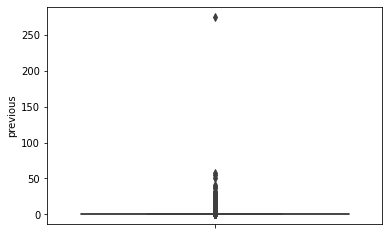

In [32]:
sns.boxplot(y=dataset['previous'])

In [33]:
dataset.balance[dataset["previous"]==0].count()

30635

## Categorical Data

In [34]:
dataset["job"].value_counts()

blue-collar      8342
management       7537
technician       6331
admin.           4433
services         3584
retired          1840
self-employed    1280
entrepreneur     1230
unemployed       1095
housemaid        1018
student           807
unknown           219
Name: job, dtype: int64

In [35]:
dataset["education"].value_counts()

secondary    19829
tertiary     10645
primary       5735
unknown       1507
Name: education, dtype: int64

In [36]:
dataset["contact"].value_counts()

cellular     24497
unknown      11024
telephone     2195
Name: contact, dtype: int64

In [37]:
dataset["poutcome"].value_counts()

unknown    30640
failure     4250
other       1554
success     1272
Name: poutcome, dtype: int64

In [38]:
dataset["month"].value_counts()

may    12139
jul     5722
aug     4800
jun     4224
nov     3017
apr     2562
feb     2294
jan     1317
oct      602
sep      488
mar      378
dec      173
Name: month, dtype: int64

In [39]:
dataset["y"].value_counts()

no     33330
yes     4386
Name: y, dtype: int64

In [40]:
dataset["default"].value_counts()

no     36991
yes      725
Name: default, dtype: int64

# Dependent And Independent data

In [41]:
X = dataset.iloc[:,:-1].values
X1 = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Label encoder dependent data

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the DATA into Training and Test

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scalling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[0,5,9,11,12,13]] = sc.fit_transform(X_train[:,[0,5,9,11,12,13]])
X_test[:,[0,5,9,11,12,13]] = sc.transform(X_test[:,[0,5,9,11,12,13]])

## One Hot Encoding

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4,6,7,8,10,14])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

# Decision Tree

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1[:,4] = le.fit_transform(X1[:,4])
X1[:,6] = le.fit_transform(X1[:,6])
X1[:,7] = le.fit_transform(X1[:,7])
X1[:,1] = le.fit_transform(X1[:,1])
X1[:,2] = le.fit_transform(X1[:,2])
X1[:,3] = le.fit_transform(X1[:,3])
X1[:,8] = le.fit_transform(X1[:,8])
X1[:,10] = le.fit_transform(X1[:,10])
X1[:,14] = le.fit_transform(X1[:,14])

In [47]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=4, random_state = 0)
classifier.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)

In [49]:
y1_pred = classifier.predict(X1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,f1_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
recall_score(y1_test, y1_pred)

[[7561  732]
 [ 778  358]]


0.31514084507042256

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state = 0)
classifier1.fit(X1_train, y1_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
y1_pred1 = classifier1.predict(X1_test)
print(np.concatenate((y1_pred1.reshape(len(y1_pred1),1), y1_test.reshape(len(y1_test),1)),1))

[[0 0]
 [0 1]
 [0 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
cm = confusion_matrix(y1_test, y1_pred1)
print(cm)
recall_score(y1_test, y1_pred1)

[[8160  133]
 [ 910  226]]


0.198943661971831

# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_predknn = classifier2.predict(X_test)
print(np.concatenate((y_predknn.reshape(len(y_predknn),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
cm = confusion_matrix(y_test, y_predknn)
print(cm)
recall_score(y_test, y_predknn)

[[8120  173]
 [ 901  235]]


0.2068661971830986

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression(random_state=0)
classifier4.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [58]:
y_pred4 = classifier4.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
recall_score(y_test, y_pred4)

[[8186  107]
 [ 928  208]]


0.18309859154929578

# Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred5 = classifier5.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
cm = confusion_matrix(y_test, y_pred5)
print(cm)
recall_score(y_test, y_pred5)

[[7480  813]
 [ 664  472]]


0.4154929577464789

# SVM

In [63]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(random_state=0)

In [64]:
y_predsvm = classifier3.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
cm = confusion_matrix(y_test, y_predsvm)
print(cm)
recall_score(y_test, y_predsvm)

[[8183  110]
 [ 925  211]]


0.1857394366197183